# tf.data.Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
# iterator

#in 구문 안에서 내부적으로 iterator 형태로 바꿔지기 때문에 for 문이 돌아간다.
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [4]:
data = [1,2,3,4,5]
my_iter = iter(data)
i = my_iter.__next__()
print(i)
i = my_iter.__next__()
print(i)
i = my_iter.__next__()
print(i)
i = my_iter.__next__()
print(i)
i = my_iter.__next__()
print(i)

1
2
3
4
5


In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test,y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.2, stratify=y_train)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


In [7]:
X_train = X_train.astype('float')/255.
X_val = X_val.astype('float')/255.
X_test = X_test.astype('float')/255.

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [11]:
# pytorch의 data_loader와 같은 역할
train_ds = train_ds.shuffle(buffer_size = 50000).batch(batch_size=32)
# 이외에도 cache(),prepetch(). 등의 기능 사용도 가능

In [25]:
my_iter = iter(train_ds)
# 데이터를 iter 시킬때마다 x,y값이 나온다.
x, y = my_iter.next()

len(x),len(y)

TensorShape([32, 28, 28])

<function matplotlib.pyplot.show(*args, **kw)>

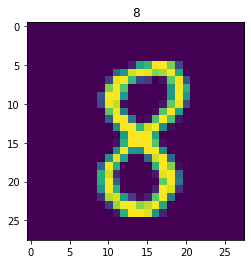

In [18]:
plt.imshow(x[0])
plt.title(y[0].numpy())
plt.show

In [19]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(batch_size=32)

In [20]:
def build_model_4():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape = (28,28,1)),
        layers.MaxPool2D(2),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPool2D(2),

        layers.Flatten(),

        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy', # 이 부분만 바꿔주면 내부적으로 온핫을 실행한다.
        metrics = ['acc']
    )
    return model

In [21]:
model = build_model_4()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [23]:
EPOCHS = 10
# 온핫 데이터가 아닌 오리지널 데이터를 사용한다.

log = model.fit(train_ds,
                epochs=EPOCHS,
                validation_data = val_ds,
                verbose=1)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0420 - val_acc: 0.9891
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0084 - acc: 0.9973 - val_loss: 0.0423 - val_acc: 0.9890
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.0413 - val_acc: 0.9900
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0075 - acc: 0.9978 - val_loss: 0.0414 - val_acc: 0.9902
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0047 - acc: 0.9985 - val_loss: 0.0527 - val_acc: 0.9900
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0059 - acc: 0.9981 - val_loss: 0.0525 - val_acc: 0.9910
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0512 - val_acc: 0.9902
Epoch 8/10
1500/1500 [==============================] - 6s 4ms

In [27]:
model.evaluate(train_ds)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.0011 - acc: 0.9997


[0.001100500114262104, 0.999666690826416]

In [29]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
y_pred

array([[1.6299972e-16, 6.1641486e-12, 4.3810285e-15, ..., 1.0000000e+00,
        5.0413260e-13, 3.9060534e-12],
       [4.3584792e-13, 2.3985070e-17, 1.0000000e+00, ..., 3.6408826e-20,
        4.8909752e-21, 7.9628393e-18],
       [5.1094417e-11, 9.9999988e-01, 3.5994010e-11, ..., 3.0146960e-10,
        1.3944148e-09, 5.4187391e-11],
       ...,
       [2.9142155e-27, 5.1435864e-19, 4.0773267e-22, ..., 4.4283156e-20,
        1.1748103e-14, 1.1823706e-17],
       [1.6056702e-15, 5.5627957e-26, 8.3245139e-24, ..., 5.4431242e-26,
        7.6982398e-17, 4.1352741e-19],
       [3.3112588e-19, 2.6893466e-18, 2.6460151e-19, ..., 5.9435172e-26,
        2.3788986e-16, 1.2945668e-20]], dtype=float32)

In [31]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])